# Diabates prediction 

# GuideLines
    
1)DATA VISUALIZATION

2)FILLNA 

3)SCALE DATA 

4)FEATURE SELECTION  

5)TRAIN THE MODEL  

6)ACCURACY 

7)CONFUSION MATRIX 

8)ROC AUC 

9)Hyperparameter optimization 
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

# Data Visualization

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


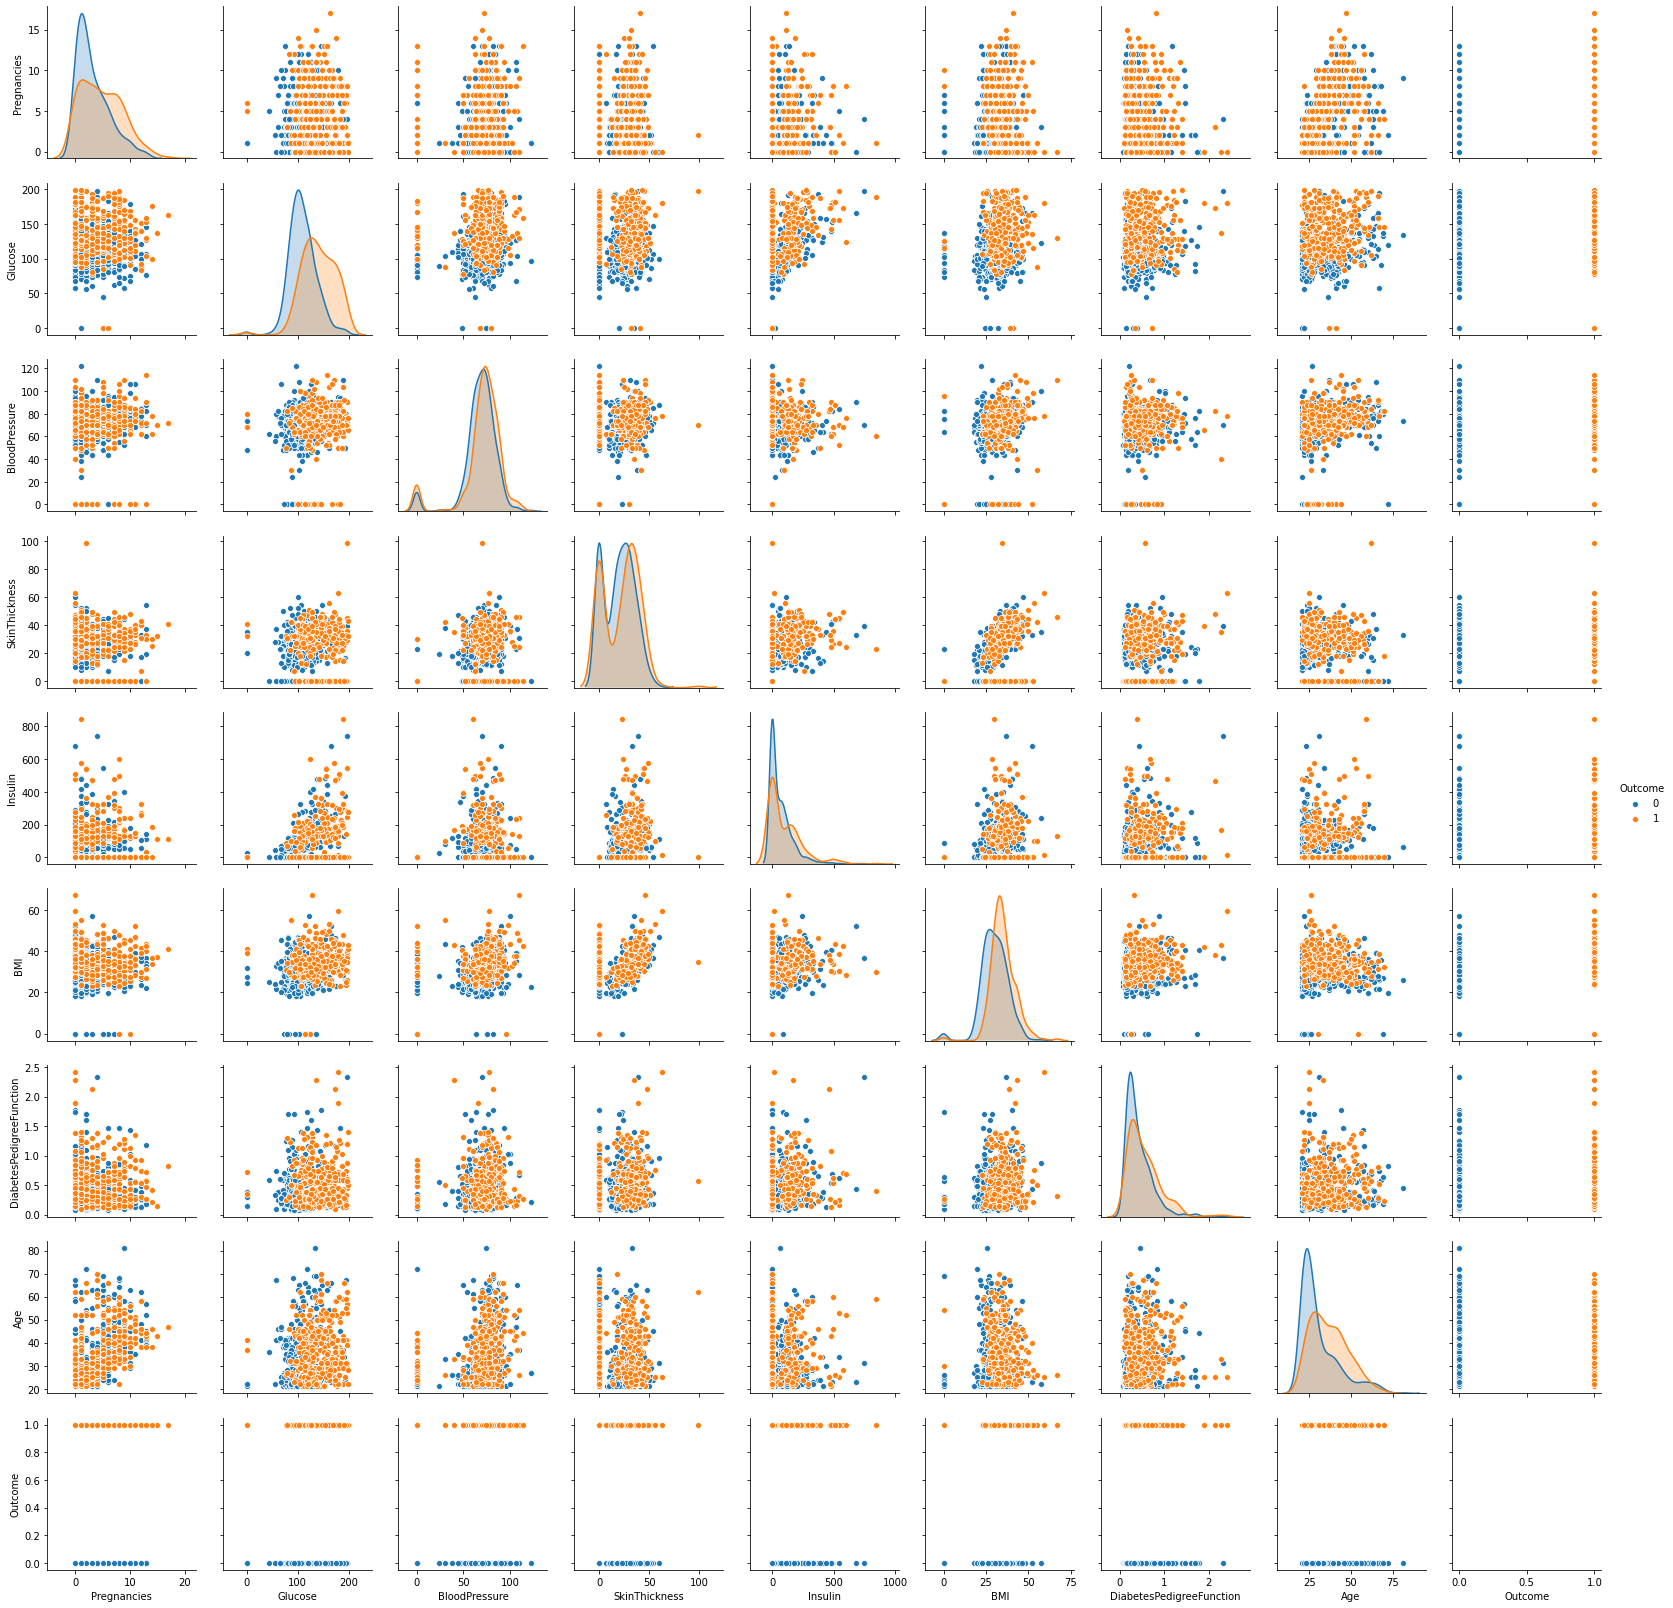

In [3]:
sns.pairplot(data=df, hue='Outcome')

#data is unclean 

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


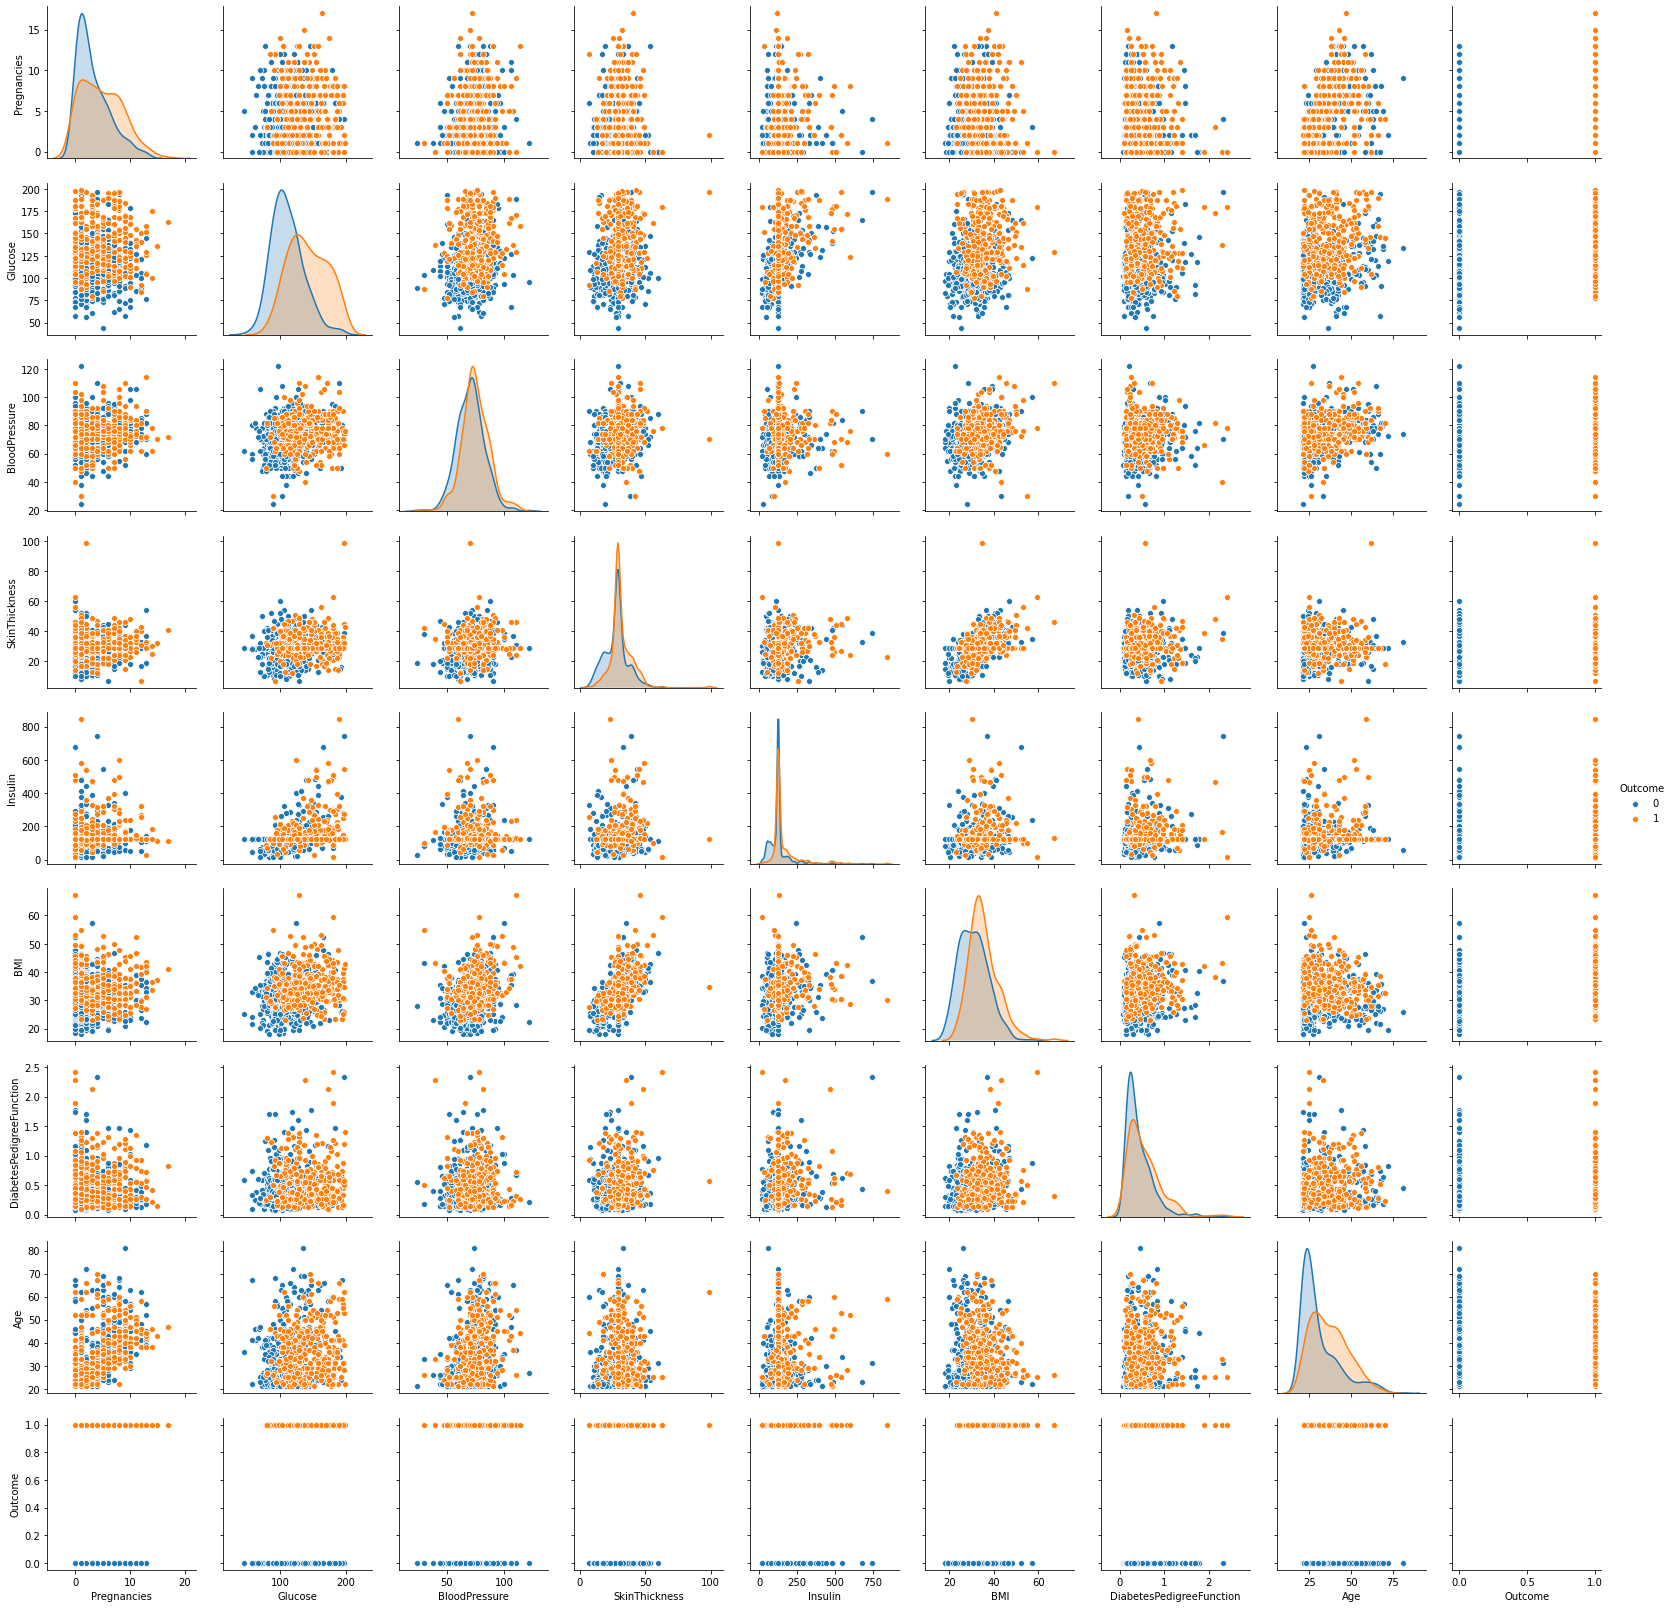

In [10]:
sns.pairplot(df_copy, hue='Outcome')

#data clean 
#not my personal fav

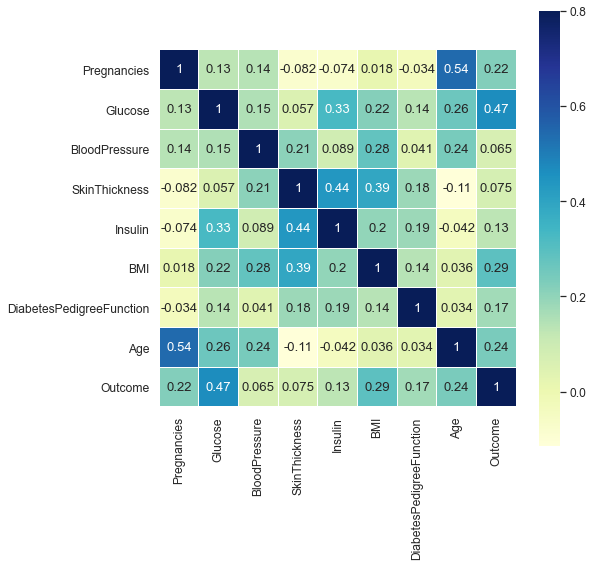

In [11]:
corr = df.corr()

sns.set(font_scale=1.1)
plt.figure(figsize=(8,8))

sns.heatmap(corr, vmax=0.8, cmap='YlGnBu', square=True, linewidths=0.01, annot=True)

#corr = used to find correlation b/w all the columns 
#vmax= vertical line maximun value = 0.8
#square = True, each cell is square shaped 
#annot = write values in each cell 

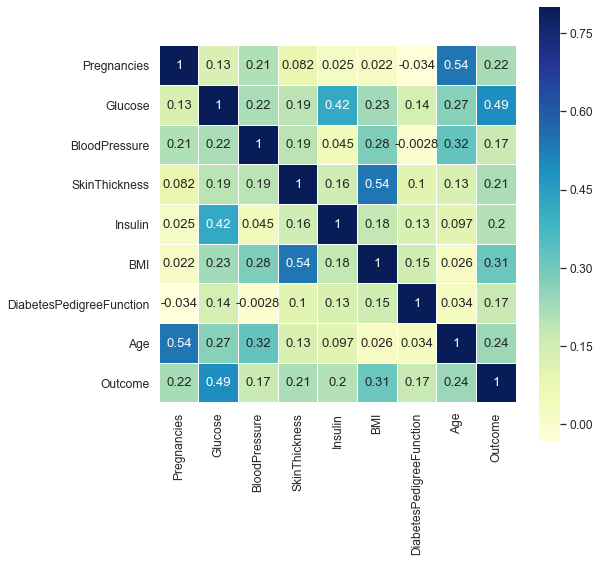

In [12]:
corr = df_copy.corr()

sns.set(font_scale=1.1)
plt.figure(figsize=(8,8))

sns.heatmap(corr, vmax=0.8, cmap='YlGnBu', square=True, linewidths=0.01, annot=True)
 
#my recommended way to analyse correlation 

# EDA and statistical analysis 

In [58]:
df.info(verbose=True)

#verbose = shows more wordy info, highly descriptive 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
df.describe().T.drop('Outcome')

#only numerical values not categoric  

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


# FillNa

replace with 0 values from glu, bp, st, in, bmi with NaN and then replace Nan with mean or median  

In [5]:
df_copy = df.copy(deep =True)

#when deep = True, actual python objects aren't copied, we are just taking refrences 

In [6]:
df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]=df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [7]:
print(df_copy.isnull().sum())

#isnull is calculating the total number of NaN values in respective columns 

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


analyse skewness of the histogram graph to fillna with mean or median 
if skewness = right, i.e when mean>median for example insulin
so in this case fillna with the median 
else if skewness = left, i.e when median>mean for example BP
so in this case fillna with the mean 

In [18]:
np.mean(df['Insulin'])

79.79947916666667

In [19]:
np.median(df['Insulin'])

30.5

In [8]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].mean(), inplace = True)

#inplace = true means we are modifying that value permanently 
#if many outliers use median else mean >> refer describe table(more accurate) or else histogram and check for skewness 

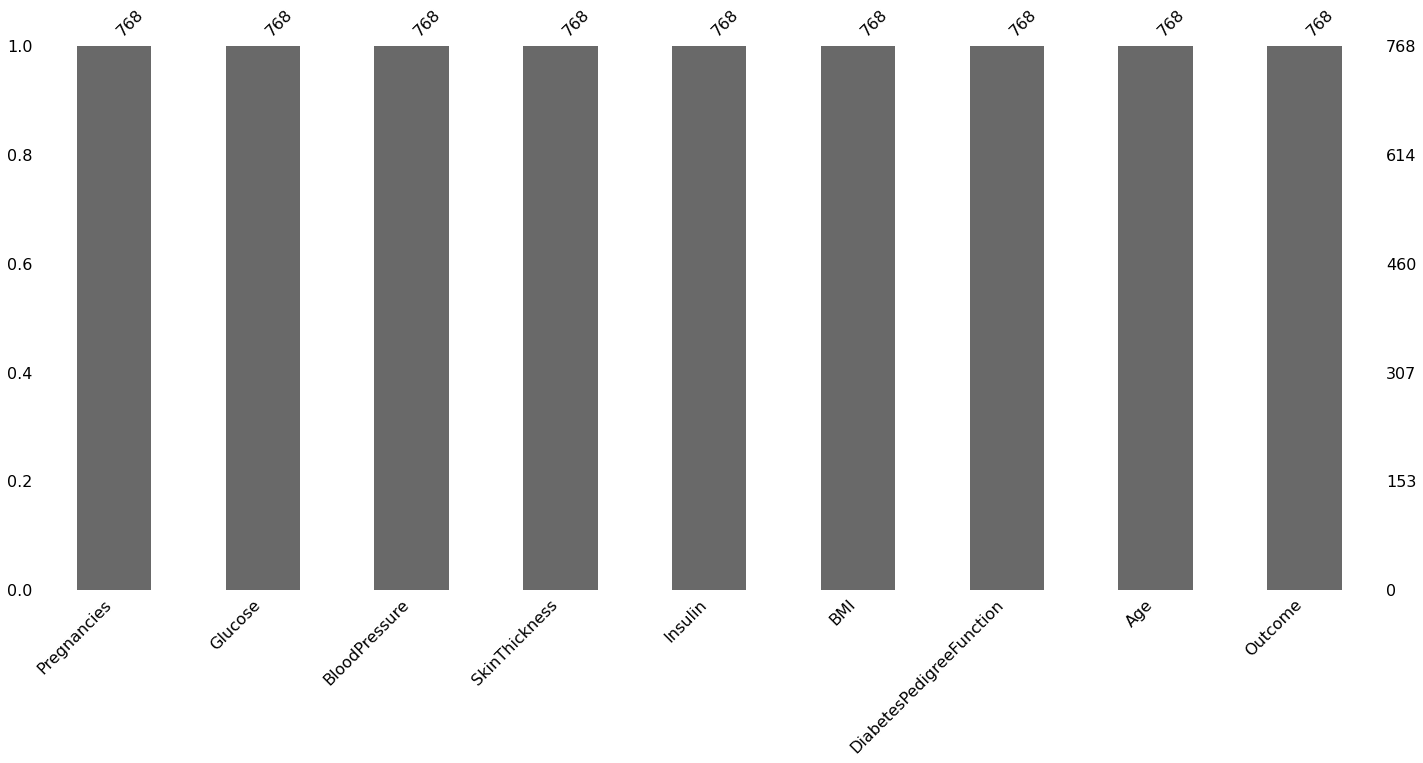

In [9]:
import missingno as msno

p = msno.bar(df_copy)

#mnso= missing data's visualization tool 
#didnt find any diff b/w df and df_copy ! why?

# histogram before & after data replacing 

C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_matplotli

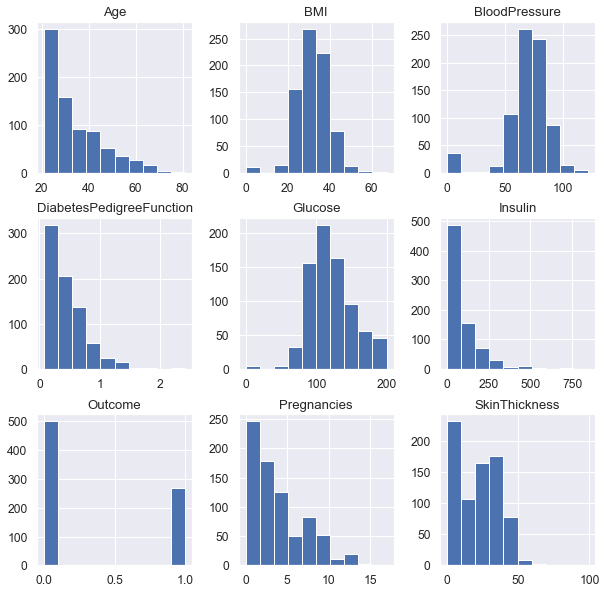

In [13]:
#histogram without nan values 

h = df.hist(figsize=(10,10))

#here we use mlxtend feature to plot all features from the df, instead of plt as the code will be lengthy 

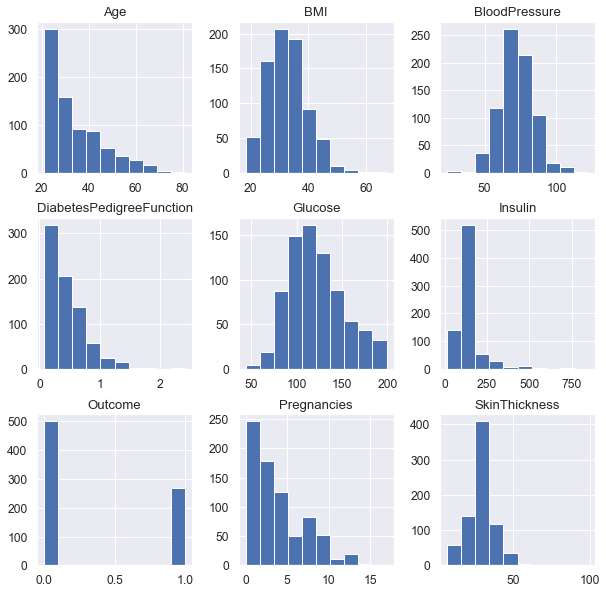

In [14]:
#hist with nan values 

h =df_copy.hist(figsize=(10,10))

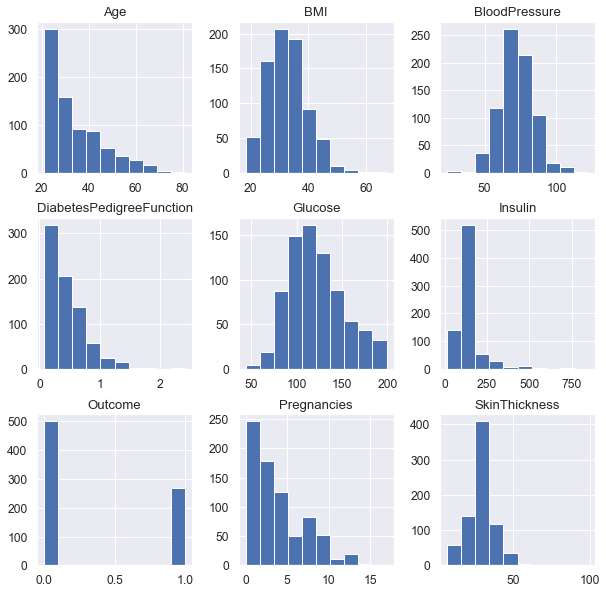

In [15]:
#hist after replacing nan with mean/median 

l = df_copy.hist(figsize=(10,10))

# scaling data 

In [29]:
from sklearn.preprocessing import MinMaxScaler 
#values scaled down b/w 0 and 1 

scaler1 = MinMaxScaler()

output1 = scaler1.fit_transform(df_copy.drop(['Outcome'], axis=1))

#axis = 0 = independently std each feature 
#axis = 1 = take samples 



In [30]:
a = pd.DataFrame(output1, 
            columns=['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
'Age'])

a.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


In [31]:
from sklearn.preprocessing import StandardScaler
#mean =0 st_dev = 1

scaler2= StandardScaler()

output2 = scaler2.fit_transform(df_copy.drop(['Outcome'], axis=1))


In [32]:
x = pd.DataFrame(output2, 
        columns=['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
'Age'])

x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.548980,5.484909,-0.020496


In [33]:
y = df_copy.Outcome 

# spliting data 

In [34]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 20, stratify = y )


In [35]:
from sklearn.neighbors import KNeighborsClassifier 

test_score = []
train_score = []
#store all accuracy scores for k = 1 to 15

for i in range(1, 16):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    
    train_score.append( knn.score(x_train, y_train) )
    test_score.append( knn.score(x_test, y_test) )
    #calculating knn model's accuracy score 
    

In [36]:
max_train_score = max(train_score)
max_train_score*100

100.0

In [37]:
train_score

[1.0,
 0.8229166666666666,
 0.8472222222222222,
 0.8003472222222222,
 0.8107638888888888,
 0.8003472222222222,
 0.8055555555555556,
 0.7881944444444444,
 0.7986111111111112,
 0.7708333333333334,
 0.7899305555555556,
 0.7864583333333334,
 0.7916666666666666,
 0.7847222222222222,
 0.78125]

In [38]:
max_test_score = max(test_score)*100
print('%.2f' %max_test_score, '%')

81.77 %


In [39]:
print( round (max_test_score,2), '%')

81.77 %


In [40]:
list1 = [i for i, j in (list(enumerate(test_score)))]

list(map(lambda x: x+1, list1))


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [41]:
list1 = list(enumerate(test_score))

list1

[(0, 0.7135416666666666),
 (1, 0.7552083333333334),
 (2, 0.765625),
 (3, 0.7552083333333334),
 (4, 0.75),
 (5, 0.78125),
 (6, 0.7760416666666666),
 (7, 0.78125),
 (8, 0.796875),
 (9, 0.7864583333333334),
 (10, 0.8020833333333334),
 (11, 0.7916666666666666),
 (12, 0.8177083333333334),
 (13, 0.8020833333333334),
 (14, 0.796875)]

In [42]:
print(f'The highest accuracy is ', round(max_test_score,2), '%', f'for k=', 13)

The highest accuracy is  81.77 % for k= 13


# Plot train vs test

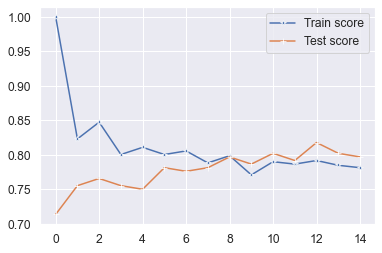

In [43]:
p = sns.lineplot(x=np.arange(15),y=train_score, marker='*', label= 'Train score')
p = sns.lineplot(x=np.arange(15),y=test_score, marker='+', label= 'Test score')

# confusion matrix 

In [44]:
from sklearn.metrics import confusion_matrix 

In [45]:
y_pred = knn.predict(x_test)

In [46]:
print(confusion_matrix(y_test, y_pred))

#confusion_matrix(input, output)

[[114  11]
 [ 28  39]]


Text(28.5, 0.5, 'Actual class')

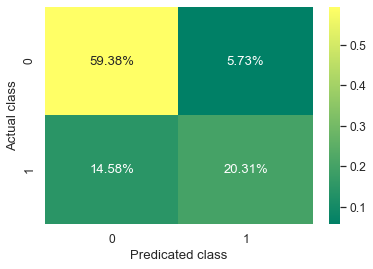

In [47]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='summer')

plt.xlabel('Predicated class')
plt.ylabel('Actual class')

#TN, FP
#FN, TP

# ROC 

In [48]:
from sklearn.metrics import roc_curve 

In [49]:
y_pred_prob = knn.predict_proba(x_test)[:,1]

In [50]:
fpr, tpr, thersholds = roc_curve(y_test, y_pred_prob)

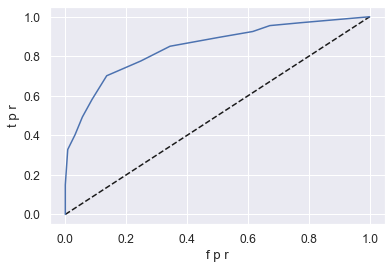

In [51]:
plt.plot([0,1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('f p r')
plt.ylabel('t p r')

plt.show()

# hyperparameter optimization 

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
parameters = {'n_neighbors' : np.arange(1,40) }

In [54]:
knn_cv = GridSearchCV(knn, param_grid=parameters, cv=5)

In [55]:
knn_cv.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=15, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [56]:
score = knn_cv.best_score_
print(f'Best score : ', round(score,3) )

Best score :  0.771


In [57]:
para = knn_cv.best_params_
print(f'Best parameter is', para)

Best parameter is {'n_neighbors': 18}
